# Table of Contents
## 1. Import Libraries and Data
## 2. Clean Data
## 3. Time Series Decomposition
## 4. Test for Stationarity
## 5. Stationarize Data

# 1. Import Libraries and Data

In [106]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import os
import warnings 
warnings.filterwarnings("ignore") 
plt.style.use('fivethirtyeight') 

In [107]:
#Display graphs w/o calling
%matplotlib inline

In [108]:
#Import data
path = r"C:\Users\carol\Documents\Career Foundry\6 Advanced Analytics & Dashboard Design"
df = pd.read_csv(os.path.join(path, 'S_P_500.csv'), index_col = False)

# 2. Clean Data

## Review Data

In [109]:
df.head()

,Date,Close/Last,Open,High,Low
0,01/19/2024,4839.81,4796.28,4842.07,4785.87
1,01/18/2024,4780.94,4760.10,4785.79,4740.57
2,01/17/2024,4739.21,4739.13,4744.23,4714.82
3,01/16/2024,4765.98,4772.35,4782.34,4747.12
4,01/12/2024,4783.83,4791.18,4802.40,4768.98


In [110]:
df.shape

(2532, 5)

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2532 entries, 0 to 2531
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        2532 non-null   object 
 1   Close/Last  2532 non-null   float64
 2   Open        2532 non-null   float64
 3   High        2532 non-null   float64
 4   Low         2532 non-null   float64
dtypes: float64(4), object(1)
memory usage: 99.0+ KB


## Clean Data

In [112]:
#Check for missing values
df.isnull().sum()

Date          0
Close/Last    0
Open          0
High          0
Low           0
dtype: int64

In [113]:
#Check for duplicates
dups = df.duplicated()
dups.shape

(2532,)

In [114]:
#Check for mixed types
for col in df.columns.tolist():
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (df[weird]) > 0:
    print (col)

No missing values, duplicates, or mixed type columns.

## Remove Unnecessary Columns

In [115]:
df.columns

Index(['Date', 'Close/Last', 'Open', 'High', 'Low'], dtype='object')

In [116]:
#Create subset w/o unnecessary columns
df_tsa = df.drop(['Open', 'High', 'Low'], axis=1)

In [117]:
#Rename Close/Last column to just Close
df_tsa = df_tsa.rename(columns={'Close/Last': 'Close'})

In [118]:
#Check results
df_tsa.head()

,Date,Close
0,01/19/2024,4839.81
1,01/18/2024,4780.94
2,01/17/2024,4739.21
3,01/16/2024,4765.98
4,01/12/2024,4783.83


## Plot Data

In [119]:
# Set the "Date" column as the index
from datetime import datetime

df_tsa['datetime'] = pd.to_datetime(df_tsa['Date'])
df_tsa = df_tsa.set_index('datetime')
df_tsa.drop(['Date'], axis=1, inplace=True)
df_tsa.head()

,Close
datetime,
2024-01-19,4839.81
2024-01-18,4780.94
2024-01-17,4739.21
2024-01-16,4765.98
2024-01-12,4783.83


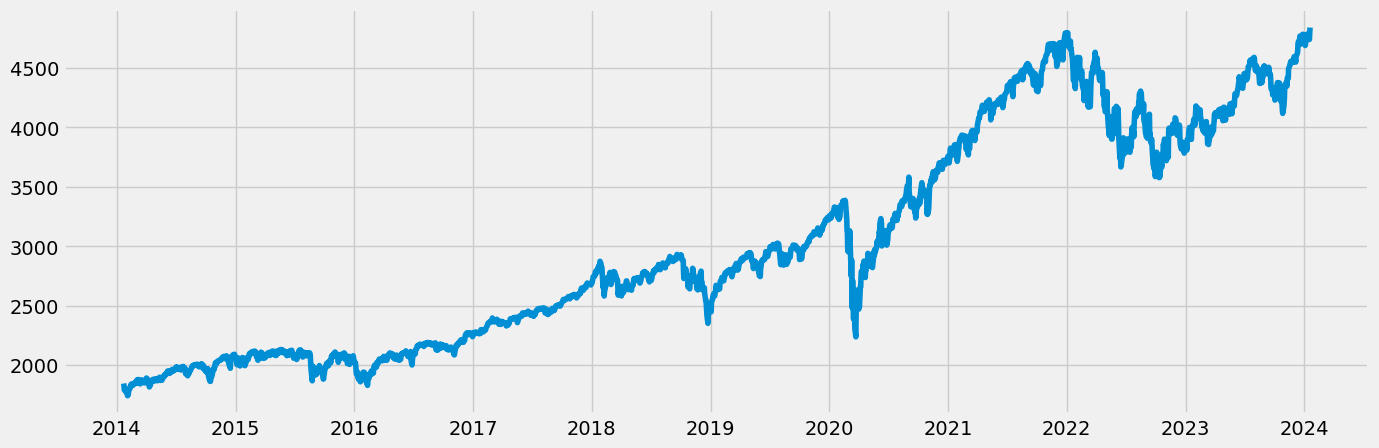

In [120]:
plt.figure(figsize=(15,5), dpi=100) 
plt.plot(df_tsa)

# 3. Time Series Decomposition

## Fix Frequency Issue

When I first tried to run seasonal decompose, I got an error because the index did not have an assigned frequency, so I have to address that first.

In [121]:
print(df_tsa.index.freq)

None


In [122]:
#Assign frequency as business
df_tsa = df_tsa.asfreq('B')

In [123]:
print(df_tsa.index.freq)

<BusinessDay>


In [140]:
df_tsa.value_counts(dropna = False)

Close  
NaN        76
1864.85     2
2019.42     2
2126.06     2
2095.84     2
           ..
2425.55     1
2427.43     1
2428.37     1
2429.01     1
2809.21     1
Length: 2504, dtype: int64

In [131]:
df_tsa.sort_index()

,Close
datetime,
2014-01-22,1844.86
2014-01-23,1828.46
2014-01-24,1790.29
2014-01-27,1781.56
2014-01-28,1792.50
...,...
2024-01-15,NaN
2024-01-16,4765.98
2024-01-17,4739.21


In [135]:
df_tsa.shape

(2608, 1)

In [148]:
#Replace nan values with the average of the values right before and after it
for value in range(0,2608):
    if  np.isnan(df_tsa['Close'].iloc[value]) == True:
        avg = (df_tsa['Close'].iloc[value-1] + df_tsa['Close'].iloc[value+1])/2
        print(avg)
        df_tsa['Close'].iloc[value] = avg

2028.3000000000002
1880.83
1880.1799999999998
2036.495
2098.01
2095.75
2183.23
2209.035
2266.335
2248.33
2271.265
2358.27
2338.98
2414.365
2430.775
2467.2
2599.75
2681.92
2684.71
2781.33
2724.24
2611.375
2705.5950000000003
2724.915
2899.12
2641.245
2698.005
2409.3999999999996
2508.44
2651.8050000000003
2777.6800000000003
2906.5
2814.225
2993.115
2916.365
3147.3050000000003
3231.645
3244.315
3325.205
3375.225
2775.7250000000004
2973.6099999999997
3154.865
3379.4
3634.0
3719.21
3728.36
3783.58
3933.71
4048.89
4203.075
4347.9400000000005
4527.73
4648.04
4758.49
4619.98
4326.8150000000005
4392.139999999999
4145.195
3719.815
3828.3599999999997
3916.2250000000004
4026.69
3837.035
3831.8199999999997
3995.0299999999997
4038.215
4107.0650000000005
4205.485000000001
4399.15
4451.205
4506.3
4557.98
4764.6900000000005
4756.33
4774.905


In [149]:
#Check results
df_tsa.value_counts(dropna = False)

Close  
2088.87    2
2102.31    2
1838.63    2
1900.53    2
2926.46    2
          ..
2431.77    1
2432.46    1
2432.54    1
2433.14    1
4839.81    1
Length: 2579, dtype: int64

In [150]:
print(df_tsa.index.freq)

<BusinessDay>


In [151]:
#Decompose time series using an additive model
decomp = sm.tsa.seasonal_decompose(df_tsa, model='additive')

In [152]:
from pylab import rcParams 
rcParams['figure.figsize'] = 18, 7

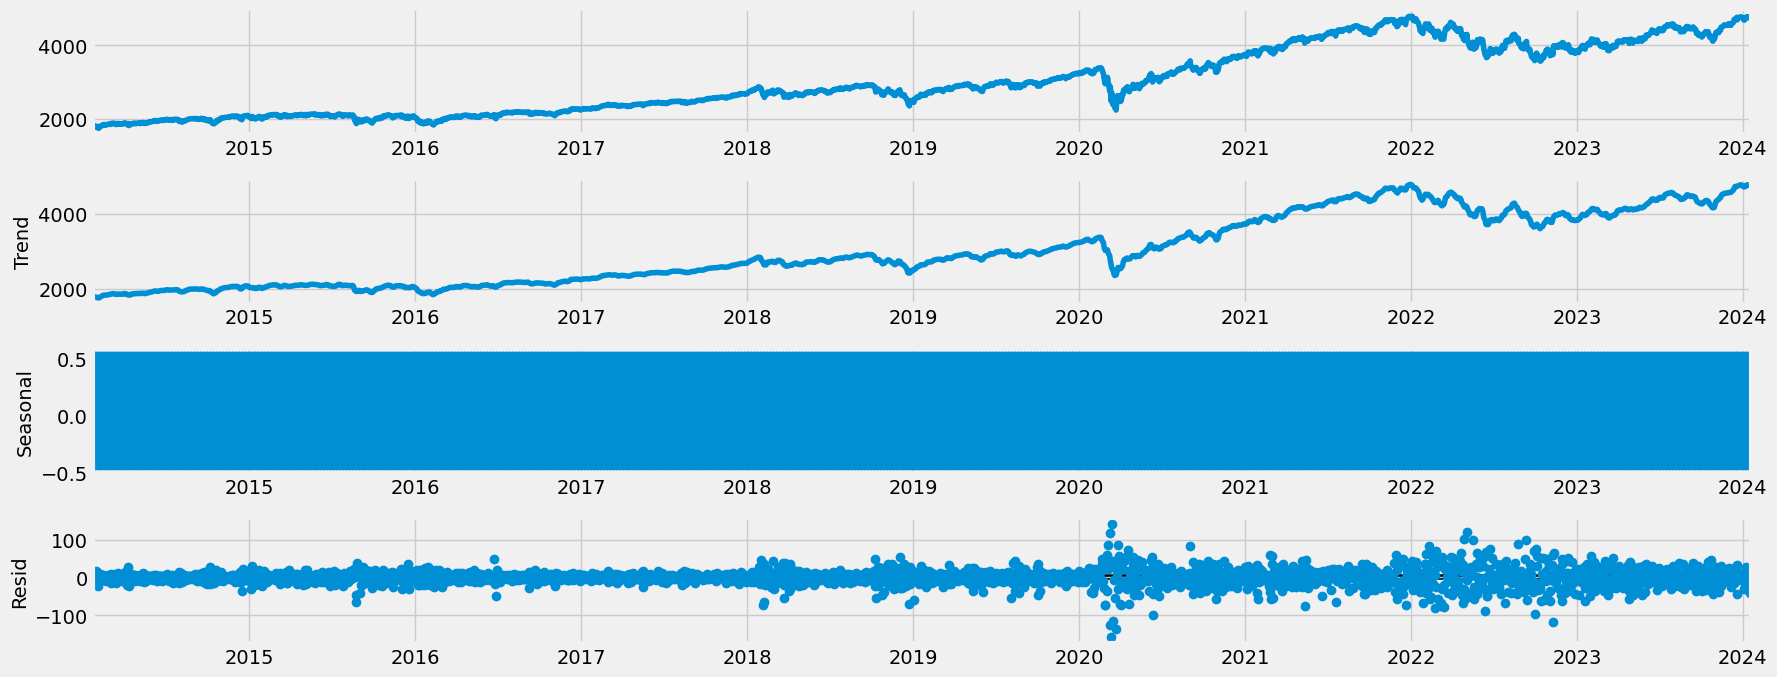

In [153]:
#Plot the separate components
decomp.plot()
plt.show()

The underlying trend looks quite similar to the level, so the data doesn't have much noise. There does not appear to be any seasonality. There is some noise but based on a compariosn between the level and the trend it's not significant.

# 4. Test for Stationarity

In [154]:
#Import the adfuller() function
from statsmodels.tsa.stattools import adfuller 

#Define the function
def dickey_fuller(timeseries): 
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(df_tsa['Close'])

Dickey-Fuller Stationarity test:
Test Statistic                   -0.264386
p-value                           0.930399
Number of Lags Used              13.000000
Number of Observations Used    2594.000000
Critical Value (1%)              -3.432873
Critical Value (5%)              -2.862655
Critical Value (10%)             -2.567363
dtype: float64


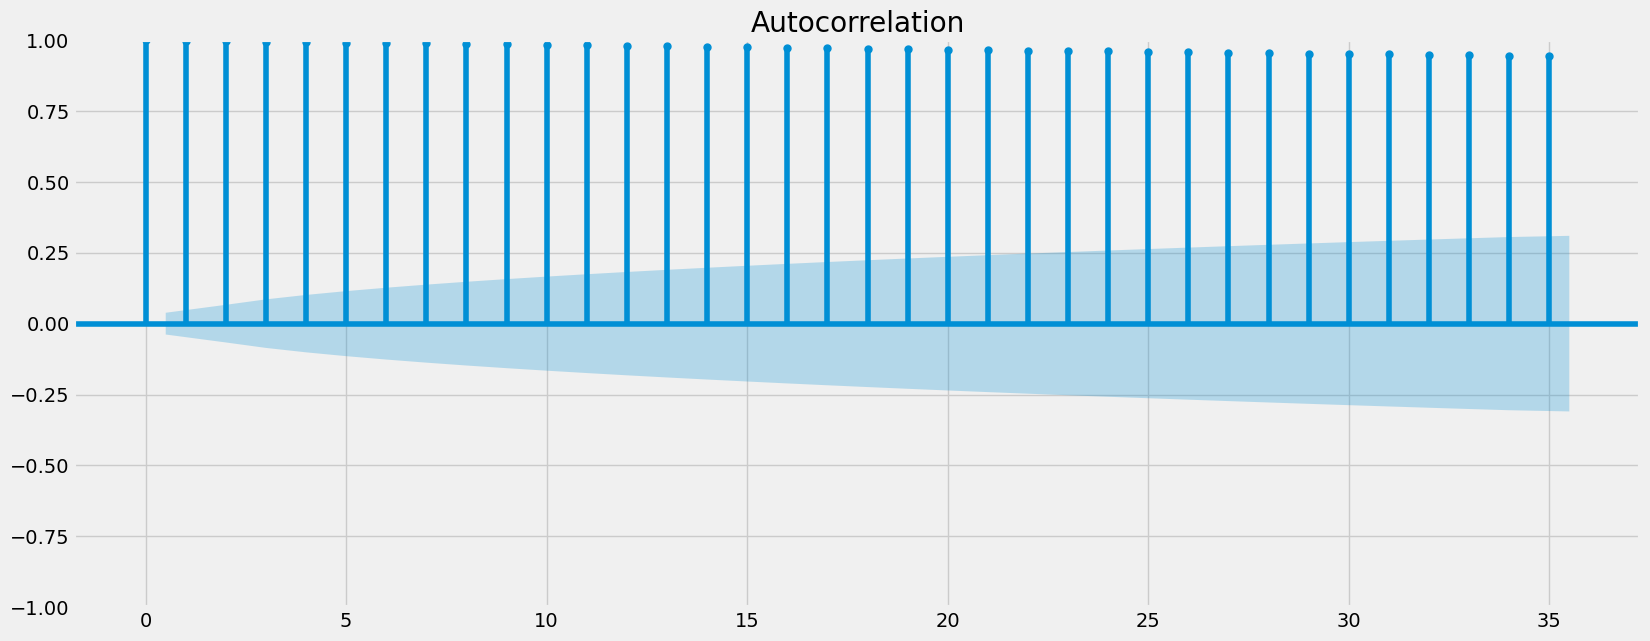

In [155]:
#Plot autocorrelations
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
plot_acf(df_tsa)
plt.show()

Since the test statistic is larger than the critical value, there is a unit root in the data and therefore it is non-stationary

# 5. Stationarize Data

## Round 1 Stationarizing

In [156]:
data_diff = df_tsa - df_tsa.shift(1)

In [157]:
data_diff.dropna(inplace = True)

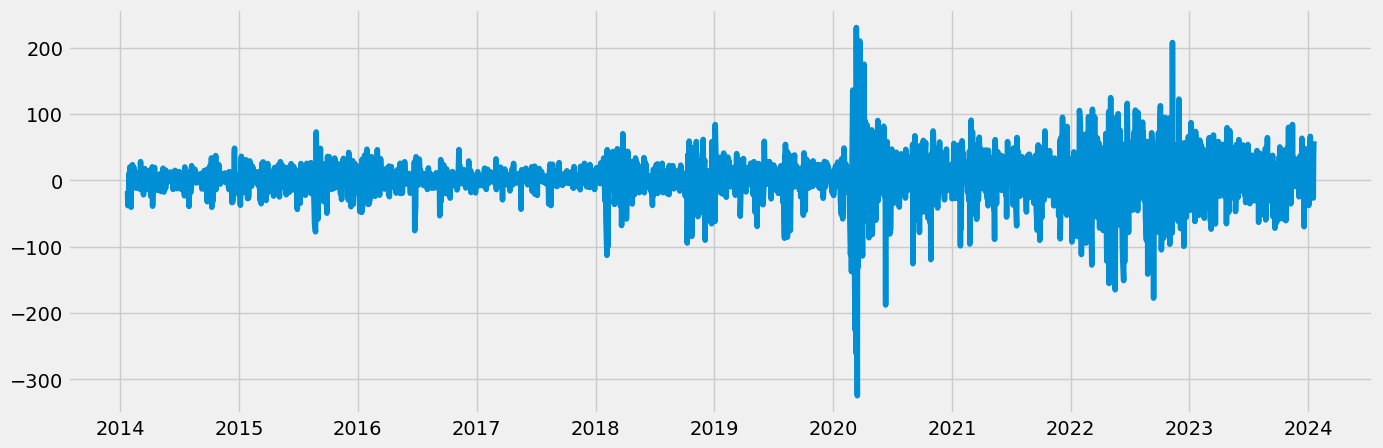

In [158]:
#Check time-series curve
plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [159]:
#Rerun dickey fuller
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                -1.452676e+01
p-value                        5.412676e-27
Number of Lags Used            1.200000e+01
Number of Observations Used    2.594000e+03
Critical Value (1%)           -3.432873e+00
Critical Value (5%)           -2.862655e+00
Critical Value (10%)          -2.567363e+00
dtype: float64


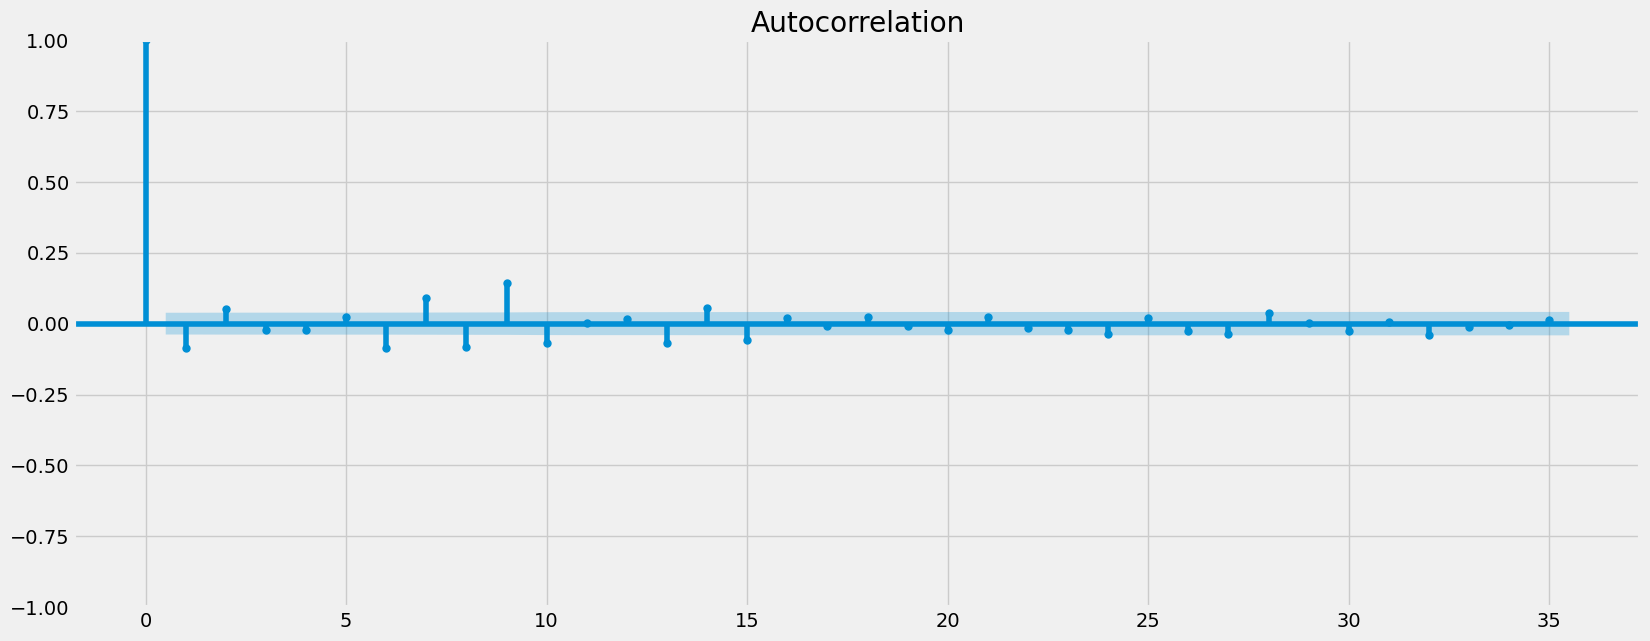

In [160]:
plot_acf(data_diff)
plt.show()

The autocorrelation chart shows 10 lags so I'm going to run stationarity again.

## Round 2 Stationarizing

In [165]:
data_diff2 = data_diff - data_diff.shift(1)

In [166]:
data_diff2.dropna(inplace = True)

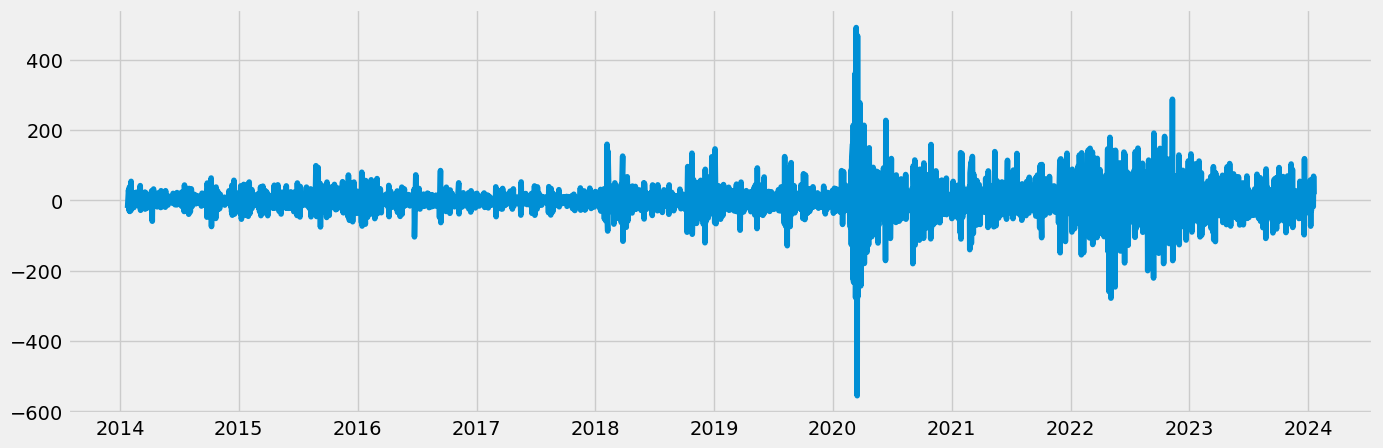

In [167]:
#Check time-series curve
plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff2)

In [168]:
#Rerun dickey fuller
dickey_fuller(data_diff2)

Dickey-Fuller Stationarity test:
Test Statistic                -1.649795e+01
p-value                        2.161888e-29
Number of Lags Used            2.700000e+01
Number of Observations Used    2.578000e+03
Critical Value (1%)           -3.432889e+00
Critical Value (5%)           -2.862662e+00
Critical Value (10%)          -2.567367e+00
dtype: float64


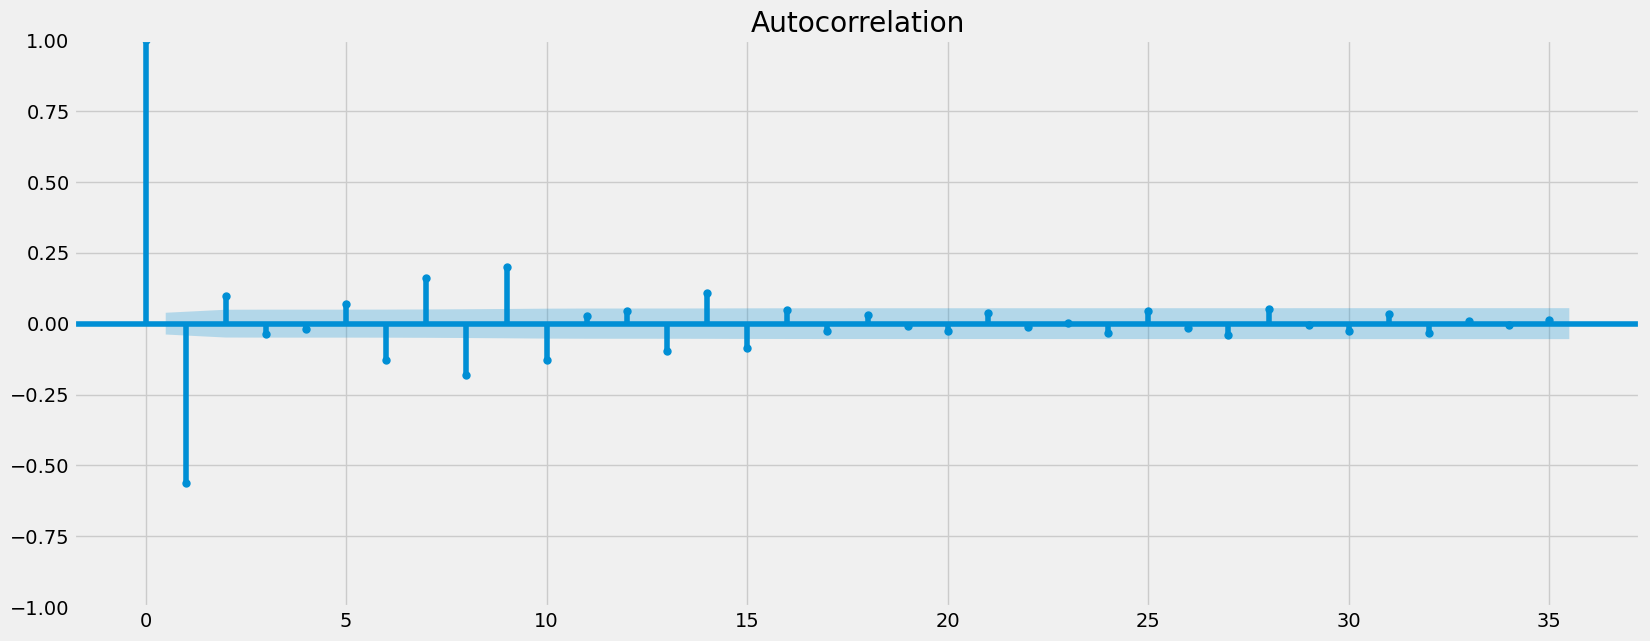

In [169]:
plot_acf(data_diff2)
plt.show()

## Round 3 Stationarizing

In [170]:
data_diff3 = data_diff2 - data_diff2.shift(1)

In [171]:
data_diff3.dropna(inplace = True)

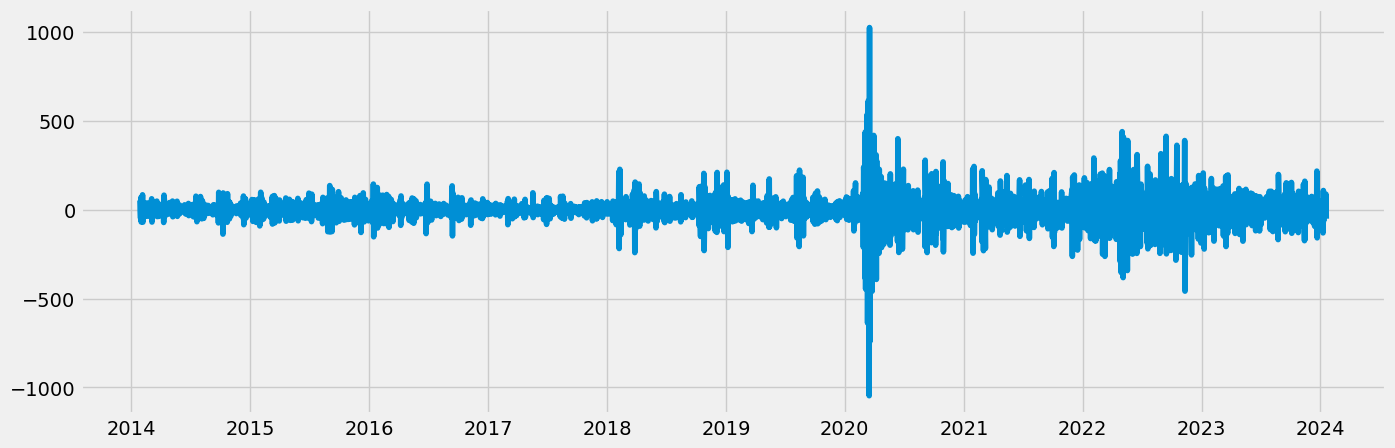

In [172]:
#Check time-series curve
plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff3)

In [173]:
#Rerun dickey fuller
dickey_fuller(data_diff3)

Dickey-Fuller Stationarity test:
Test Statistic                  -20.393490
p-value                           0.000000
Number of Lags Used              28.000000
Number of Observations Used    2576.000000
Critical Value (1%)              -3.432891
Critical Value (5%)              -2.862663
Critical Value (10%)             -2.567368
dtype: float64


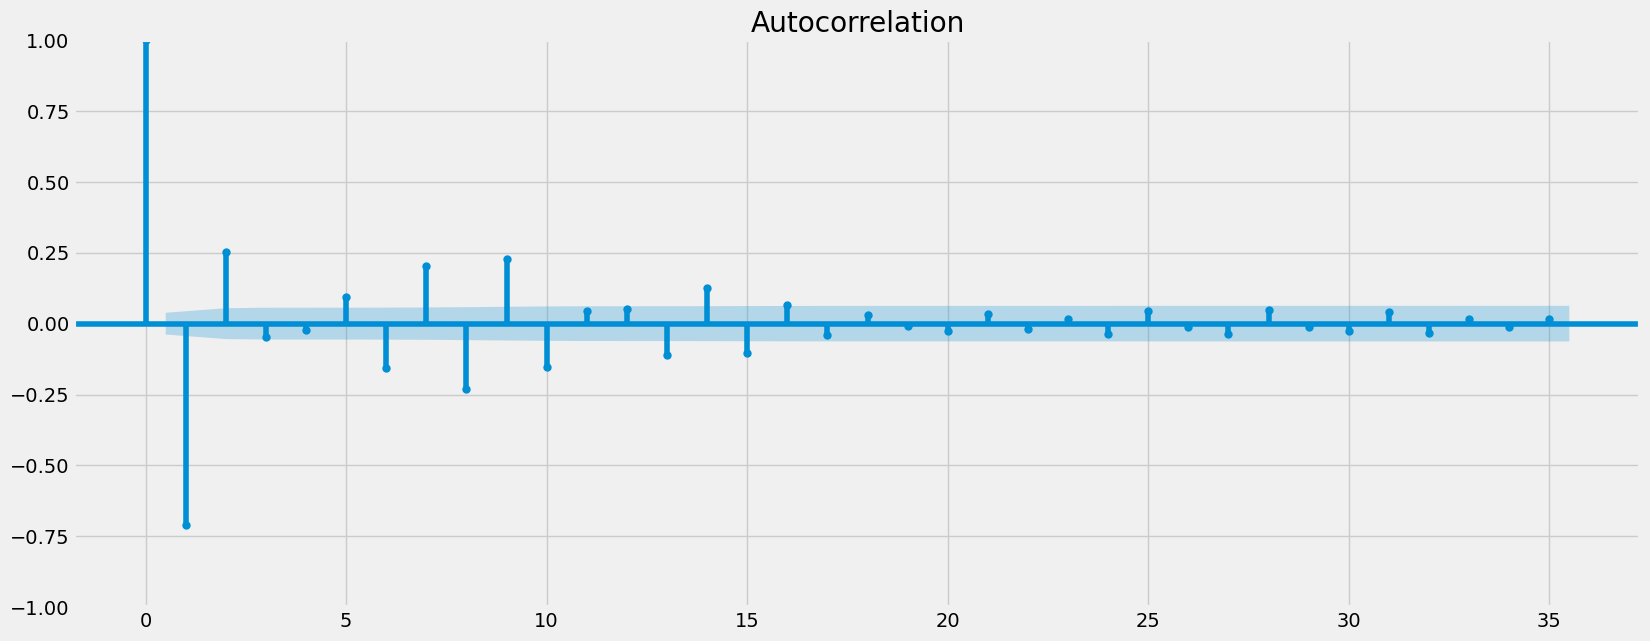

In [174]:
plot_acf(data_diff3)
plt.show()

After 3 rounds of stationarizing the test statistic is getting increasingly smaller compared to the critical values, and the p-value has gone to 0. Although the autocorrelation is still showing lags, I think it's ok to stop stationarizing now based on the Dickey Fuller test.